___

# Time Series Prediction (typora)

## General Characteristics

Components of a time series:

  - **Trend**
  - **Seasonal component** (a *repeating* trend)
  - **Cycle** (*trend* with no repetition) 

Any time series at time $t$ can then be defined as:
$$
Y_{t} = T_{t} + C_{t} + S_{t} + \epsilon_{t}
$$
Where $T_{t}$: trend (slow and usually monotonic). $C_{t}$: cycle. $S_{t}$: seasonality. $\epsilon_{t}$: noise.

Hodrick Prescott filter 
$$
\min _{{\tau }}\left(\sum _{{t=1}}^{T}{(y_{t}-\tau _{t})^{2}}+\lambda \sum _{{t=2}}^{{T-1}}{[(\tau _{{t+1}}-\tau _{t})-(\tau _{t}-\tau _{{t-1}})]^{2}}\right).\,
$$

ETS Models (Error, Trend, Seasonality)

**Additive** model: when the data look like linear, or **Multiplicative** model, when the data look like exponential




1. Remove the trend and seasonal components to get **stationary residuals**.
2. Choose a model to fit the residuals, making use of various sample statistics including the sample **autocorrelation** function
3. Forecasting will be achieved by forecasting the residuals and then **inverting** the transformations described above



## Noise

The noise sequence would be an iid noise if in addition the elements are not just uncorrelated but also independet. So therefore every iid noise is also white noise, but the reverse is just true for Gaussian white noise sequence.

## Stationarity

Let $Xt$ be a time series with $E(X^2_t ) < ∞ $. The mean function of $Xt$ is: $$γ_{X}(t + h, t) = μ_X(t) = E(X_t)$$

The covariance function of $Xt$ is: $$Cov(Xr,Xs) = E[(Xr − μX(r))(Xs − μX(s))]$$

for all integers r and s. $Xt$ is (weakly) stationary if: 1) $μ_{X}(t)$ is independent of t (same expectation) 2) $γ_{X}(t + h, t)$ is independent of $t$ for each $h$ (e.g. covariance depends on time difference only)

It can be shown, in fact, that for iid noise with finite variance, the sample autocorrelations $ρ(h)$, are approximately IID $N(0, 1/n)$ for $n$ large. Hence, approximately 95% of the sample autocorrelations should fall between the bounds $±1.96/\sqrt{n}$ (since 1.96 is the .975 quantile of the standard normal distribution). For data containing a trend, $|ρ(h)|$ will exhibit slow decay as h increases, and for data with a substantial deterministic periodic component, $|ρ(h)|$ will exhibit similar behavior with the same periodicity. Thus $ρ(·)$ can be useful as an indicator of nonstationarity.

## Trend and Seasonal Component

Inspection of a graph may also suggest the possibility of representing the data as a realization of the process (the classical decomposition model) $Xt = m_t + s_t + Y_t$ , where $m_t$ is a slowly changing function known as a trend component, $s_t$ is a function with known period d referred to as a seasonal component, and $Y_t$ is a random noise component that is stationary. If the seasonal and noise fluctuations appear to increase with the level of the process, then a preliminary transformation of the data is often used to make the transformed data more compatible with the model (e.g. apply logarithm of the time series). It is useful to think of $m\_{t}$ as a process obtained from $Xt$ by application of a linear operator or linear filter

$$m_t = \sum \_{j=−∞}^{∞} a_{j} X_{t−j}$$

with weights $a_j = (2q + 1)^{-1}$, with $−q ≤ j ≤ q$. This particular filter is a low-pass filter

Another way to get rid of the trend is differencing, i.e. subtracting the value of the previous day.

<span style="color:red">Autocorrelation for MA process</span>

<span style="color:red">Autocorrelation for AR process</span>

In testing with ML techniques, i can use the predicted points for even further predictions, or I can use the "real" point to forecast.



____

# Time Series

Additive decomposition

$$
y_{t} = S_{t} + T_{t} + R_t,
$$


Multiplicative decomposition

$$
y_{t} = S_{t} \times T_{t} \times R_t
$$

The additive decomposition is the most appropriate if the magnitude of the seasonal fluctuations, or the variation around the trend-cycle, does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative decomposition is more appropriate

$$
y_{t} = S_{t} \times T_{t} \times R_t \quad\text{is equivalent to}\quad
  \log y_{t} = \log S_{t} + \log T_{t} + \log R_t.
$$

Seasonally adjusted series contain the remainder component as well as the trend-cycle. Therefore, they are not “smooth”, and “downturns” or “upturns” can be misleading. If the purpose is to look for turning points in a series, and interpret any changes in direction, then it is better to use the trend-cycle component rather than the seasonally adjusted data.

The first step in a classical decomposition is to use a **moving average method to estimate the trend-cycle**, so we begin by discussing moving averages.

<center><em>Adapted from Pierian Data</em></center>

<div class="alert alert-info"><h3>Further Reading:</h3>
    
<a href='https://otexts.com/fpp2/ets.html'>Nice book on Forecasting</a></strong>&nbsp;&nbsp;</div>

## ETS

## Error/Trend/Seasonality Models
As we begin working with <em>endogenous</em> data ("endog" for short) and start to develop forecasting models, it helps to identify and isolate factors working within the system that influence behavior. Here the name "endogenous" considers internal factors, while "exogenous" would relate to external forces. These fall under the category of <em>state space models</em>, and include <em>decomposition</em> (described below), and <em>exponential smoothing</em> (described in an upcoming section).

The <a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>decomposition</a> of a time series attempts to isolate individual components such as <em>error</em>, <em>trend</em>, and <em>seasonality</em> (ETS). We've already seen a simplistic example of this in the <strong>Introduction to Statsmodels</strong> section with the Hodrick-Prescott filter. There we separated data into a trendline and a cyclical feature that mapped observed data back to the trend.


## Seasonal Decomposition
Statsmodels provides a <em>seasonal decomposition</em> tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.


We apply an <strong>additive</strong> model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).<br>
A <strong>multiplicative</strong> model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

For these examples we'll use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

In [3]:
from pylab import rcParams

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

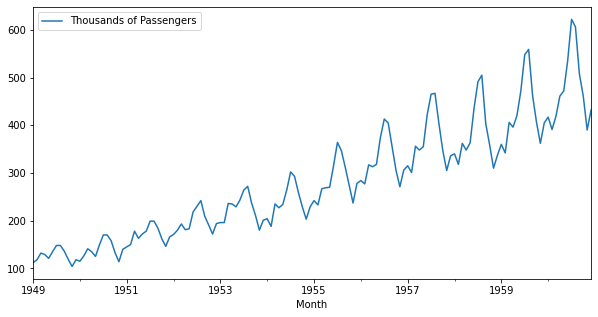

In [4]:
%matplotlib inline
filename = '/TimeSeriesAnalysis/TSA_COURSE_NOTEBOOKS/Data/airline_passengers.csv' 
ROOT_DIR = 'C:/Users/ilsup/PycharmProjects/Warehouse'

airline = pd.read_csv(ROOT_DIR + filename, index_col='Month', parse_dates=True)
rcParams['figure.figsize'] = 10, 5
airline.dropna(inplace=True)
airline.plot();

### ETS Models 
(Error, Trend, Seasonality)

**Additive** model: when the data look like linear, or **Multiplicative** model, when the data look like exponential; 

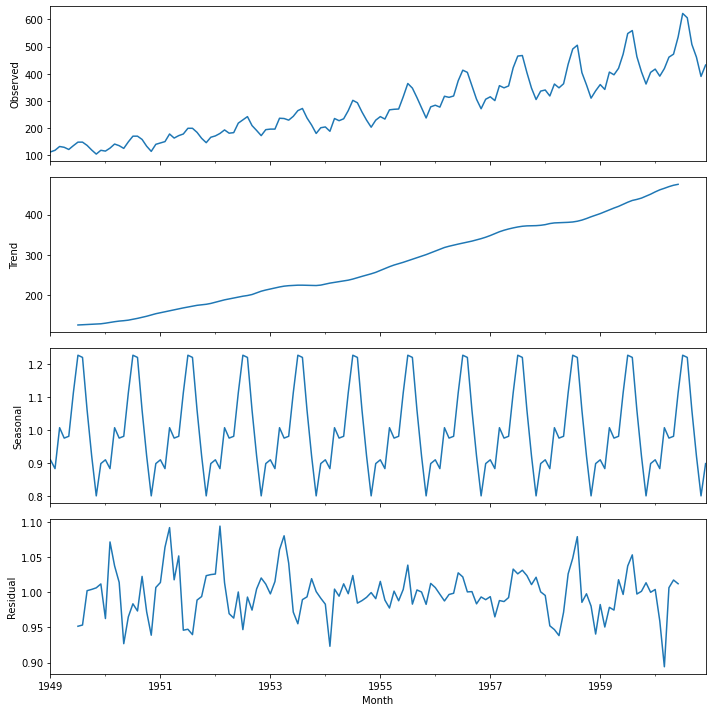

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

rcParams['figure.figsize'] = 10, 10
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')  # model='mul' also works
result.plot();

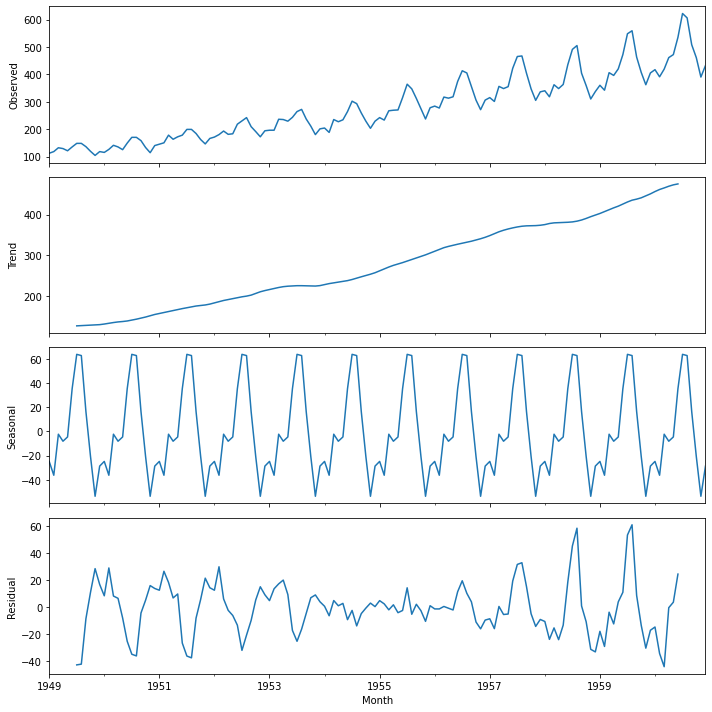

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

rcParams['figure.figsize'] = 10, 10
result = seasonal_decompose(airline['Thousands of Passengers'], model='additive')  # model='mul' also works
result.plot();

## Classical Decomposition

Let's only calculate multiplicative 


1. If $m$ is an even number, compute the trend-cycle component $\hat{T}_t$ using a 2×$m$ moving average
2. These seasonal indexes are then adjusted to ensure that they add to $m$
3. 
4. 

In [9]:
%matplotlib inline
ROOT_DIR = 'C:/Users/ilsup/PycharmProjects/Warehouse'
airline = pd.read_csv(ROOT_DIR + '/TimeSeriesAnalysis/TSA_COURSE_NOTEBOOKS/Data/airline_passengers.csv',
                      index_col='Month',
                      parse_dates=True)

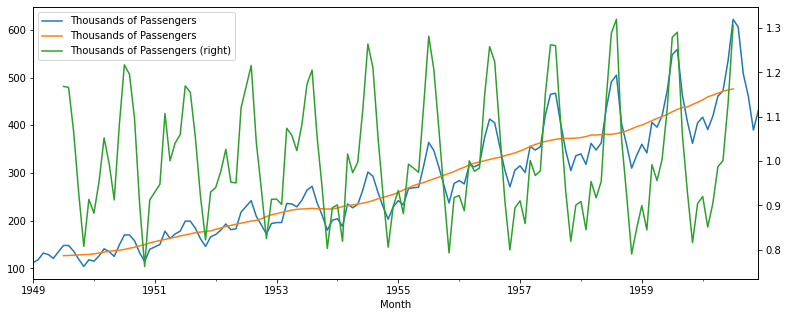

In [10]:
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(111)
m = 12  # monthly data
airline.plot(ax=ax)

airline_roll_mean = airline.rolling(window=m, center=True).mean()
airline_roll_mean.plot(ax=ax)
airline_detrended = airline / airline_roll_mean
airline_detrended.plot(ax=ax, secondary_y=True)
plt.show()

In [11]:
seasonal = airline_detrended.groupby(airline_detrended.index.month).mean()
seasonal_adj = seasonal / seasonal.sum() * m  # ensure that they add to m
seasonal_adj.columns = ['season']

In [12]:
airline_roll_mean['month_match'] = [i.month for i in airline_detrended.reset_index().Month]

In [13]:
airline_with_season = airline_roll_mean.merge(seasonal_adj, left_on='month_match', right_index=True).sort_index()

In [14]:
trend_plus_season = (airline_with_season.loc[:, "Thousands of Passengers"] * airline_with_season.loc[:, "season"])

In [15]:
remainder = airline.iloc[:, 0] / trend_plus_season

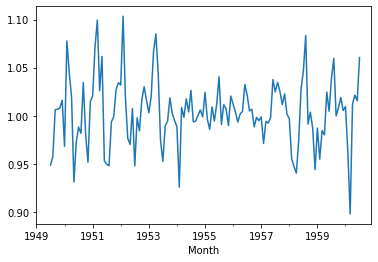

In [16]:
remainder.plot()

The **strenght of the Trend** is defined as:

$$F_T = \max\left(0, 1 - \frac{\text{Var}(R_t)}{\text{Var}(T_t+R_t)}\right).$$

The **strength of Seasonality** is defined as:

$$F_S = \max\left(0, 1 - \frac{\text{Var}(R_t)}{\text{Var}(S_{t}+R_t)}\right)$$


4.5 Autoregressive models
4.5.1 Definition
The series ${xt}$ is an autoregressive process of order p, abbreviated to AR(p), if

xt = α1xt−1 + α2xt−2 + . . . + αpxt−p + wt (4.15)

where {wt} is white noise and the αi are the model parameters with αp 6= 0
for an order p process. Equation (4.15) can be expressed as a polynomial of
order p in terms of the backward shift operator:
θp(B)xt = (1 − α1B − α2B2 − . . . − αpBp)xt = wt (4.16)
The following points should be noted:
1. The random walk is the special case AR(1) with α1 = 1
2. The exponential smoothing model is the special case αi = α(1 − α)i for i = 1, 2, . . . and p → ∞.
3. The model is a regression of xt on past terms from the same series; hence the use of the term ‘autoregressive’.
4. A prediction at time t is given by ˆxt = α1xt−1 + α2xt−2 + . . . + αpxt−p (4.17)
5. The model parameters can be estimated by minimising the sum of squared
errors.

Example
Consider the model -

$$y(t) = a + bt + c y(t-1) + u(t)$$

where $u(t)$ is white noise: $\mathrm{E}(u(t))=0$ and $\mathrm{Var}(u(t))=\sigma^2$ 

Non stationary pure Random Walk
If you have a =0 and b=0 and c = 1; then your model becomes

$$y(t) = y(t-1) + u(t)$$

This is pure random walk and non stationary.

Why non stationary?

Substitute for y(t-1) = y(t-2) + u(t-1)
And then y(t-2) = y(t-3) + u(t-1) and so on and you will get

y(t) = y(0) + u(t) + u(t-1) + u(t-2) + ....

So, we have E[y(t)] = y(0).
Var(y(t)) = t *  σ2  - Non stationary!

Below image shows an example of how such a process can evolve over time -

In [1]:
# https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

data = stock_int
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# fit model
model = ExponentialSmoothing(data, trend='add',seasonal='add',seasonal_periods=52)
model_fit = model.fit()
model_fit.fittedvalues.plot()
stock_int.plot()
plt.show()


NameError: name 'stock_int' is not defined

### Evaluating forecast

- Mean Absolute Error
- Mean Squared Error
- Root Mean Square Error
- MAPE
    $${\mbox{M}}={\frac  {1}{n}}\sum _{{t=1}}^{n}\left|{\frac  {A_{t}-F_{t}}{A_{t}}}\right|,$$

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.concat([airline, trend_plus_season], axis=1).dropna()
df.columns = ['passengers', 'fitted_passengers']

In [27]:
print('mean absolute error:', mean_absolute_error(df.passengers, df.fitted_passengers))
print('root mean squared error:', np.sqrt(mean_squared_error(df.passengers, df.fitted_passengers)))

mean absolute error: 6.85287458281773
root mean squared error: 10.35325140203052


In [29]:
train_data = airline.iloc[:108] # Goes up to but not including 108
test_data = airline.iloc[108:]

from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\ilsup\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


KeyError: 'Thousands of Passengers'

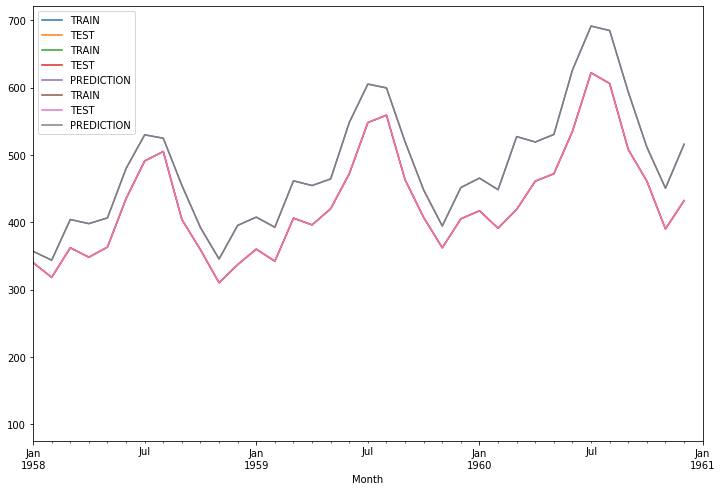

In [31]:
# YOU CAN SAF# YOU CAN SAFELY IGNORE WARNINGS HERE!
# THIS WILL NOT AFFECT YOUR FORECAST, IT'S JUST SOMETHING STATSMODELS NEEDS TO UPDATE UPON NEXT RELEASE.
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

test_predictions

train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

## Evaluation Metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test_data,test_predictions)

mean_squared_error(test_data,test_predictions)

np.sqrt(mean_squared_error(test_data,test_predictions))

test_data.describe()

## Forecasting into Future

final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

forecast_predictions = final_model.forecast(36)

df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();

In [32]:
# Stationarity
Time series data is said to be <em>stationary</em> if it does <em>not</em> exhibit trends or seasonality. That is, the mean, variance and covariance should be the same for any segment of the series, and are not functions of time.<br>
The file <tt>samples.csv</tt> contains made-up datasets that illustrate stationary and non-stationary data.

<div class="alert alert-info"><h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/stationarity.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Stationarity and differencing</font></div>

df2 = pd.read_csv('../Data/samples.csv',index_col=0,parse_dates=True)
df2.head()

df2['a'].plot(ylim=[0,100],title="STATIONARY DATA").autoscale(axis='x',tight=True);

df2['b'].plot(ylim=[0,100],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

df2['c'].plot(ylim=[0,10000],title="MORE NON-STATIONARY DATA").autoscale(axis='x',tight=True);

In an upcoming section we'll learn how to test for stationarity.

# Differencing
## First Order Differencing
Non-stationary data can be made to look stationary through <em>differencing</em>. A simple method called <em>first order differencing</em> calculates the difference between consecutive observations.

&nbsp;&nbsp;&nbsp;&nbsp;$y^{\prime}_t = y_t - y_{t-1}$

In this way a linear trend is transformed into a horizontal set of values.


# Calculate the first difference of the non-stationary dataset "b"
df2['d1b'] = df2['b'] - df2['b'].shift(1)

df2[['b','d1b']].head()

Notice that differencing eliminates one or more rows of data from the beginning of the series.

df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

An easier way to perform differencing on a pandas Series or DataFrame is to use the built-in <tt>.diff()</tt> method:

df2['d1b'] = df2['b'].diff()

df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

### Forecasting on first order differenced data
When forecasting with first order differences, the predicted values have to be added back in to the original values in order to obtain an appropriate forecast.

Let's say that the next five forecasted values after applying some model to <tt>df['d1b']</tt> are <tt>[7,-2,5,-1,12]</tt>. We need to perform an <em>inverse transformation</em> to obtain values in the scale of the original time series.

# For our example we need to build a forecast series from scratch
# First determine the most recent date in the training set, to know where the forecast set should start
df2[['b']].tail(3)

# Next set a DateTime index for the forecast set that extends 5 periods into the future
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])
z

The idea behind an inverse transformation is to start with the most recent value from the training set, and to add a cumulative sum of Fcast values to build the new forecast set. For this we'll use the pandas <tt>.cumsum()</tt> function which does the reverse of <tt>.diff()</tt>

z['forecast']=df2['b'].iloc[-1] + z['Fcast'].cumsum()
z

df2['b'].plot(figsize=(12,5), title="FORECAST").autoscale(axis='x',tight=True)

z['forecast'].plot();

## Second order differencing
Sometimes the first difference is not enough to attain stationarity, particularly if the trend is not linear. We can difference the already differenced values again to obtain a second order set of values.

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{split}y_{t}^{\prime\prime} &= y_{t}^{\prime} - y_{t-1}^{\prime} \\
&= (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) \\
&= y_t - 2y_{t-1} + y_{t-2}\end{split}$

# First we'll look at the first order difference of dataset "c"
df2['d1c'] = df2['c'].diff()

df2['d1c'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

Now let's apply a second order difference to dataset "c".

# We can do this from the original time series in one step
df2['d2c'] = df2['c'].diff().diff()

df2[['c','d1c','d2c']].head()

df2['d2c'].plot(title="SECOND ORDER DIFFERENCE").autoscale(axis='x',tight=True);

<div class="alert alert-info"><strong>NOTE: </strong>This is different from <font color=black><tt>df2['c'].diff(2)</tt></font>, which would provide a first order difference spaced 2 lags apart.<br>
We'll use this technique later to address seasonality.</div>

### Forecasting on second order differenced data
As before, the prediction values have to be added back in to obtain an appropriate forecast.

To invert the second order transformation and obtain forecasted values for $\hat y_t$ we have to solve the second order equation for $y_t$:

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{split}y_{t}^{\prime\prime} &= y_t - 2y_{t-1} + y_{t-2} \\
y_t &= y_{t}^{\prime\prime} + 2y_{t-1} - y_{t-2}\end{split}$

Let's say that the next five forecasted values after applying some model to <tt>df['d2c']</tt> are <tt>[7,-2,5,-1,12]</tt>.

# For our example we need to build a forecast series from scratch
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])
z

One way to invert a 2nd order transformation is to follow the formula above:

forecast = []

# Capture the two most recent values from the training set
v2,v1 = df2['c'].iloc[-2:]

# Apply the formula
for i in z['Fcast']:
    newval = i + 2*v1 - v2
    forecast.append(newval)
    v2,v1 = v1,newval

z['forecast']=forecast
z

Another, perhaps more straightforward method is to create a first difference set from the second, then build the forecast set from the first difference. We'll again use the pandas <tt>.cumsum()</tt> function which does the reverse of <tt>.diff()</tt>

# Add the most recent first difference from the training set to the Fcast cumulative sum
z['firstdiff'] = (df2['c'].iloc[-1]-df2['c'].iloc[-2]) + z['Fcast'].cumsum()

# Now build the forecast values from the first difference set
z['forecast'] = df2['c'].iloc[-1] + z['firstdiff'].cumsum()

z[['Fcast','firstdiff','forecast']]

df2['c'].plot(figsize=(12,5), title="FORECAST").autoscale(axis='x',tight=True)

z['forecast'].plot();

<div class="alert alert-danger"><strong>NOTE:</strong> statsmodels has a built-in differencing tool:<br>
    
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;from statsmodels.tsa.statespace.tools import diff<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;df2['d1'] = diff(df2['b'],k_diff=1)</font></tt><br><br>
    
that performs the same first order differencing operation shown above. We chose not to use it here because seasonal differencing is somewhat complicated. To difference based on 12 lags, the code would be<br><br>

<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;df2['d12'] = diff(df2['b'],k_diff=0,k_seasonal_diff=1,seasonal_periods=12)
</font></tt><br><br>

whereas with pandas it's simply<br><br>

<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;df2['d12'] = df2['b'].diff(12)
</font></tt>
</div>

## Lagging
Also known as "backshifting", lagging notation reflects the value of $y$ at a prior point in time. This is a useful technique for performing <em>regressions</em> as we'll see in upcoming sections.

\begin{split}L{y_t} = y_{t-1} & \text{      one lag shifts the data back one period}\\
L^{2}{y_t} = y_{t-2} & \text{      two lags shift the data back two periods} \end{split}
<br><br>
<table>
<tr><td>$y_t$</td><td>6</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-1}$</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-2}$</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
</table>


# Introduction to ARIMA Models
We'll investigate a variety of different forecasting models in upcoming sections, but they all stem from ARIMA.

<strong>ARIMA</strong>, or <em>Autoregressive Integrated Moving Average</em> is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

<strong>Moving Averages</strong> we've already seen with EWMA and the Holt-Winters Method.<br>
<strong>Integration</strong> will apply differencing to make a time series stationary, which ARIMA requires.<br>
<strong>Autoregression</strong> is explained in detail in the next section. Here we're going to correlate a current time series with a lagged version of the same series.<br>
Once we understand the components, we'll investigate how to best choose the $p$, $d$ and $q$ values required by the model.

### Great, let's get started!ELY IGNORE WARNINGS HERE!
# THIS WILL NOT AFFECT YOUR FORECAST, IT'S JUST SOMETHING STATSMODELS NEEDS TO UPDATE UPON NEXT RELEASE.
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

SyntaxError: invalid syntax (<ipython-input-32-0947725b5046>, line 2)

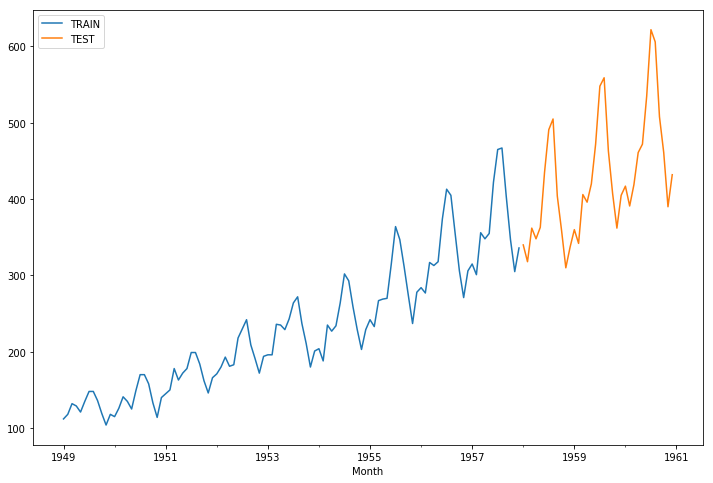

In [8]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

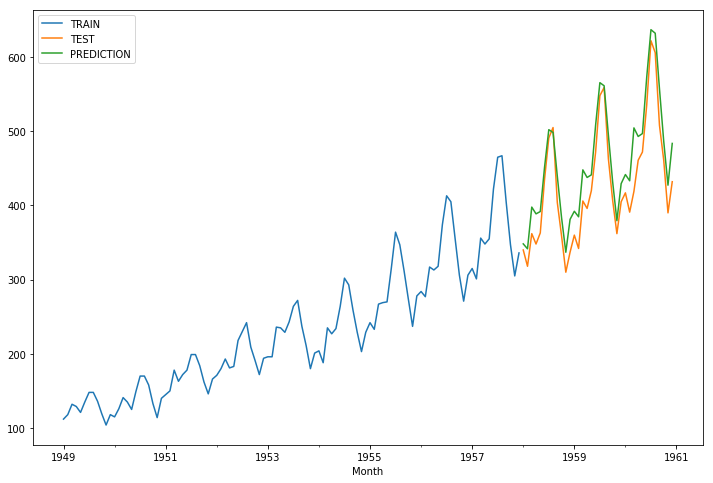

In [9]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

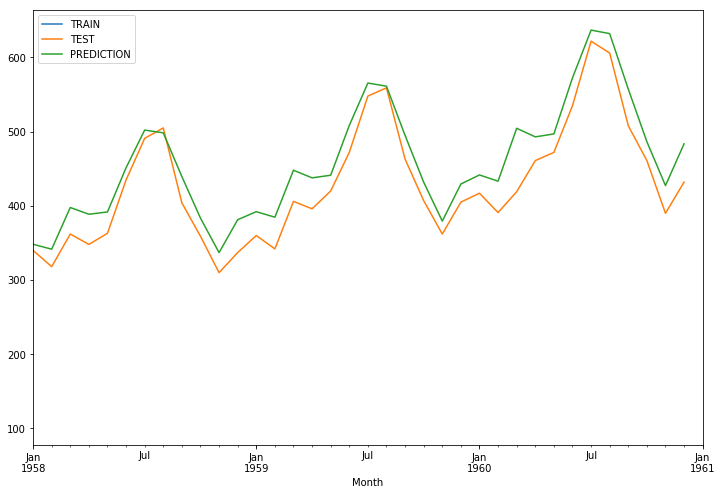

In [10]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

## Evaluation Metrics

In [11]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [12]:
mean_absolute_error(test_data,test_predictions)

30.24228895401259

In [13]:
mean_squared_error(test_data,test_predictions)

1143.4649378653387

In [14]:
np.sqrt(mean_squared_error(test_data,test_predictions))

33.815158403670665

In [15]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


## Forecasting into Future

In [16]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [17]:
forecast_predictions = final_model.forecast(36)

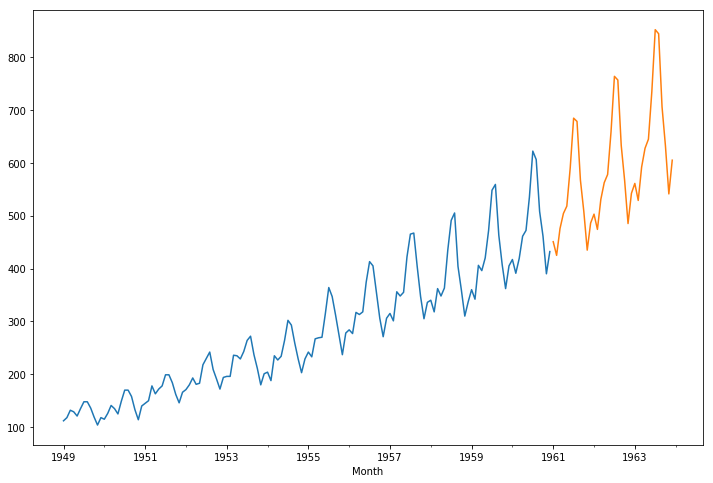

In [18]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();

# Stationarity
Time series data is said to be <em>stationary</em> if it does <em>not</em> exhibit trends or seasonality. That is, the mean, variance and covariance should be the same for any segment of the series, and are not functions of time.<br>
The file <tt>samples.csv</tt> contains made-up datasets that illustrate stationary and non-stationary data.

<div class="alert alert-info"><h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/stationarity.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Stationarity and differencing</font></div>

In [19]:
df2 = pd.read_csv('../Data/samples.csv',index_col=0,parse_dates=True)
df2.head()

,a,b,c
1950-01-01,36,27,0
1950-02-01,58,22,3
1950-03-01,61,17,5
1950-04-01,37,15,8
1950-05-01,66,13,8


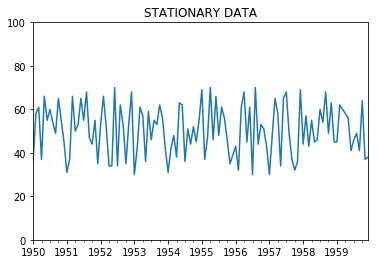

In [20]:
df2['a'].plot(ylim=[0,100],title="STATIONARY DATA").autoscale(axis='x',tight=True);

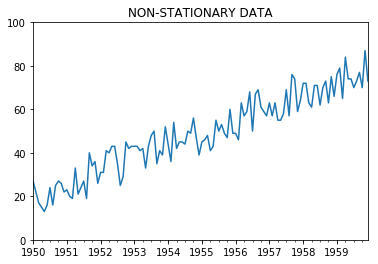

In [21]:
df2['b'].plot(ylim=[0,100],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

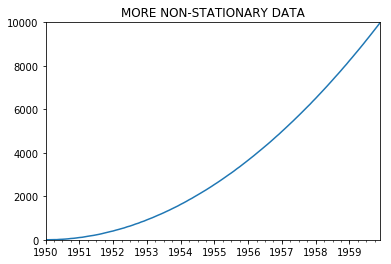

In [22]:
df2['c'].plot(ylim=[0,10000],title="MORE NON-STATIONARY DATA").autoscale(axis='x',tight=True);

In an upcoming section we'll learn how to test for stationarity.

# Differencing
## First Order Differencing
Non-stationary data can be made to look stationary through <em>differencing</em>. A simple method called <em>first order differencing</em> calculates the difference between consecutive observations.

&nbsp;&nbsp;&nbsp;&nbsp;$y^{\prime}_t = y_t - y_{t-1}$

In this way a linear trend is transformed into a horizontal set of values.


In [23]:
# Calculate the first difference of the non-stationary dataset "b"
df2['d1b'] = df2['b'] - df2['b'].shift(1)

df2[['b','d1b']].head()

,b,d1b
1950-01-01,27,NaN
1950-02-01,22,-5.0
1950-03-01,17,-5.0
1950-04-01,15,-2.0
1950-05-01,13,-2.0


Notice that differencing eliminates one or more rows of data from the beginning of the series.

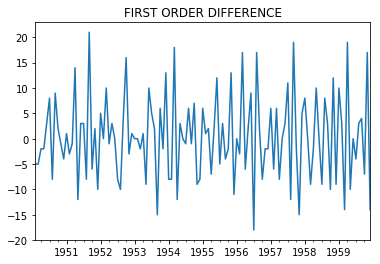

In [24]:
df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

An easier way to perform differencing on a pandas Series or DataFrame is to use the built-in <tt>.diff()</tt> method:

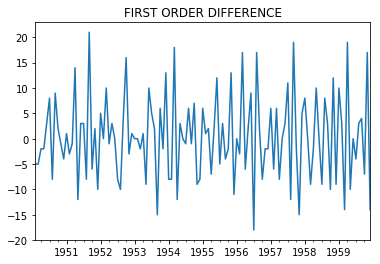

In [25]:
df2['d1b'] = df2['b'].diff()

df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

### Forecasting on first order differenced data
When forecasting with first order differences, the predicted values have to be added back in to the original values in order to obtain an appropriate forecast.

Let's say that the next five forecasted values after applying some model to <tt>df['d1b']</tt> are <tt>[7,-2,5,-1,12]</tt>. We need to perform an <em>inverse transformation</em> to obtain values in the scale of the original time series.

In [26]:
# For our example we need to build a forecast series from scratch
# First determine the most recent date in the training set, to know where the forecast set should start
df2[['b']].tail(3)

,b
1959-10-01,70
1959-11-01,87
1959-12-01,73


In [27]:
# Next set a DateTime index for the forecast set that extends 5 periods into the future
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])
z

,Fcast
1960-01-01,7
1960-02-01,-2
1960-03-01,5
1960-04-01,-1
1960-05-01,12


The idea behind an inverse transformation is to start with the most recent value from the training set, and to add a cumulative sum of Fcast values to build the new forecast set. For this we'll use the pandas <tt>.cumsum()</tt> function which does the reverse of <tt>.diff()</tt>

In [28]:
z['forecast']=df2['b'].iloc[-1] + z['Fcast'].cumsum()
z

,Fcast,forecast
1960-01-01,7,80
1960-02-01,-2,78
1960-03-01,5,83
1960-04-01,-1,82
1960-05-01,12,94


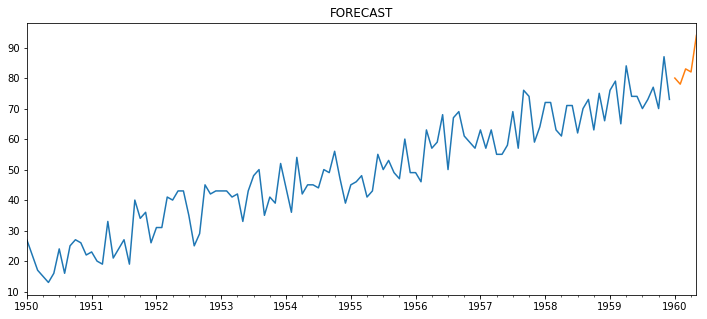

In [29]:
df2['b'].plot(figsize=(12,5), title="FORECAST").autoscale(axis='x',tight=True)

z['forecast'].plot();

## Second order differencing
Sometimes the first difference is not enough to attain stationarity, particularly if the trend is not linear. We can difference the already differenced values again to obtain a second order set of values.

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{split}y_{t}^{\prime\prime} &= y_{t}^{\prime} - y_{t-1}^{\prime} \\
&= (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) \\
&= y_t - 2y_{t-1} + y_{t-2}\end{split}$

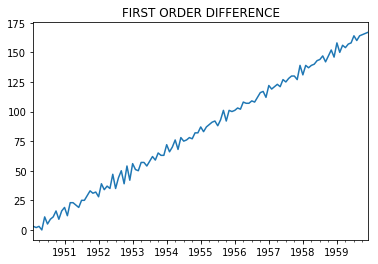

In [30]:
# First we'll look at the first order difference of dataset "c"
df2['d1c'] = df2['c'].diff()

df2['d1c'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

Now let's apply a second order difference to dataset "c".

In [31]:
# We can do this from the original time series in one step
df2['d2c'] = df2['c'].diff().diff()

df2[['c','d1c','d2c']].head()

,c,d1c,d2c
1950-01-01,0,NaN,NaN
1950-02-01,3,3.0,NaN
1950-03-01,5,2.0,-1.0
1950-04-01,8,3.0,1.0
1950-05-01,8,0.0,-3.0


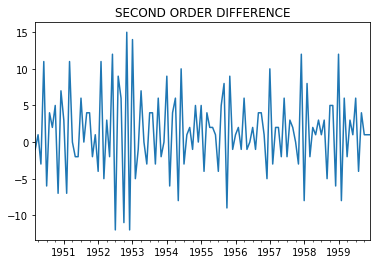

In [32]:
df2['d2c'].plot(title="SECOND ORDER DIFFERENCE").autoscale(axis='x',tight=True);

<div class="alert alert-info"><strong>NOTE: </strong>This is different from <font color=black><tt>df2['c'].diff(2)</tt></font>, which would provide a first order difference spaced 2 lags apart.<br>
We'll use this technique later to address seasonality.</div>

### Forecasting on second order differenced data
As before, the prediction values have to be added back in to obtain an appropriate forecast.

To invert the second order transformation and obtain forecasted values for $\hat y_t$ we have to solve the second order equation for $y_t$:

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{split}y_{t}^{\prime\prime} &= y_t - 2y_{t-1} + y_{t-2} \\
y_t &= y_{t}^{\prime\prime} + 2y_{t-1} - y_{t-2}\end{split}$

Let's say that the next five forecasted values after applying some model to <tt>df['d2c']</tt> are <tt>[7,-2,5,-1,12]</tt>.

In [33]:
# For our example we need to build a forecast series from scratch
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])
z

,Fcast
1960-01-01,7
1960-02-01,-2
1960-03-01,5
1960-04-01,-1
1960-05-01,12


One way to invert a 2nd order transformation is to follow the formula above:

In [34]:
forecast = []

# Capture the two most recent values from the training set
v2,v1 = df2['c'].iloc[-2:]

# Apply the formula
for i in z['Fcast']:
    newval = i + 2*v1 - v2
    forecast.append(newval)
    v2,v1 = v1,newval

z['forecast']=forecast
z

,Fcast,forecast
1960-01-01,7,10174
1960-02-01,-2,10346
1960-03-01,5,10523
1960-04-01,-1,10699
1960-05-01,12,10887


Another, perhaps more straightforward method is to create a first difference set from the second, then build the forecast set from the first difference. We'll again use the pandas <tt>.cumsum()</tt> function which does the reverse of <tt>.diff()</tt>

In [35]:
# Add the most recent first difference from the training set to the Fcast cumulative sum
z['firstdiff'] = (df2['c'].iloc[-1]-df2['c'].iloc[-2]) + z['Fcast'].cumsum()

# Now build the forecast values from the first difference set
z['forecast'] = df2['c'].iloc[-1] + z['firstdiff'].cumsum()

z[['Fcast','firstdiff','forecast']]

,Fcast,firstdiff,forecast
1960-01-01,7,174,10174
1960-02-01,-2,172,10346
1960-03-01,5,177,10523
1960-04-01,-1,176,10699
1960-05-01,12,188,10887


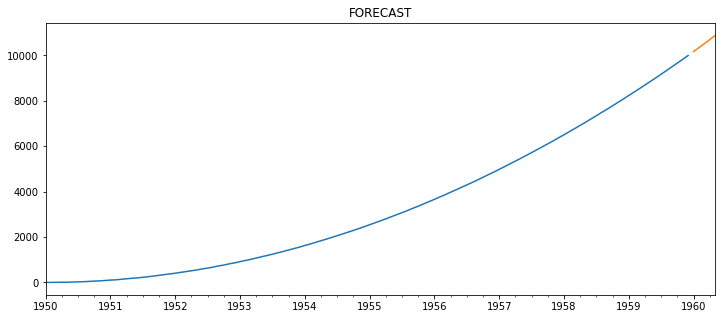

In [36]:
df2['c'].plot(figsize=(12,5), title="FORECAST").autoscale(axis='x',tight=True)

z['forecast'].plot();

<div class="alert alert-danger"><strong>NOTE:</strong> statsmodels has a built-in differencing tool:<br>
    
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;from statsmodels.tsa.statespace.tools import diff<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;df2['d1'] = diff(df2['b'],k_diff=1)</font></tt><br><br>
    
that performs the same first order differencing operation shown above. We chose not to use it here because seasonal differencing is somewhat complicated. To difference based on 12 lags, the code would be<br><br>

<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;df2['d12'] = diff(df2['b'],k_diff=0,k_seasonal_diff=1,seasonal_periods=12)
</font></tt><br><br>

whereas with pandas it's simply<br><br>

<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;df2['d12'] = df2['b'].diff(12)
</font></tt>
</div>

## Lagging
Also known as "backshifting", lagging notation reflects the value of $y$ at a prior point in time. This is a useful technique for performing <em>regressions</em> as we'll see in upcoming sections.

\begin{split}L{y_t} = y_{t-1} & \text{      one lag shifts the data back one period}\\
L^{2}{y_t} = y_{t-2} & \text{      two lags shift the data back two periods} \end{split}
<br><br>
<table>
<tr><td>$y_t$</td><td>6</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-1}$</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-2}$</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
</table>


# Introduction to ARIMA Models
We'll investigate a variety of different forecasting models in upcoming sections, but they all stem from ARIMA.

<strong>ARIMA</strong>, or <em>Autoregressive Integrated Moving Average</em> is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

<strong>Moving Averages</strong> we've already seen with EWMA and the Holt-Winters Method.<br>
<strong>Integration</strong> will apply differencing to make a time series stationary, which ARIMA requires.<br>
<strong>Autoregression</strong> is explained in detail in the next section. Here we're going to correlate a current time series with a lagged version of the same series.<br>
Once we understand the components, we'll investigate how to best choose the $p$, $d$ and $q$ values required by the model.

### Great, let's get started!

## ACF and PACF

Slow Decline for trend data

PACF: residuals vs the real values of current day

Usually number of AR components are the number of the PACF

better to grid search

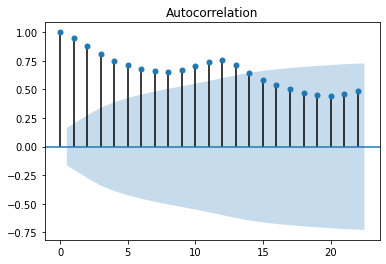

In [34]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(airline)
pyplot.show()

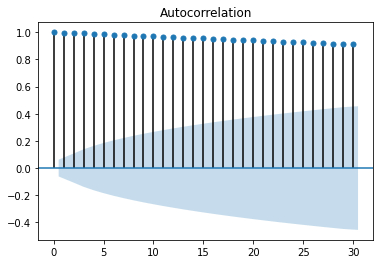

In [35]:
plot_acf(pd.Series(np.arange(1, 1000, 1)))
pyplot.show()